In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
%cd engg680_2024_fall

/content/drive/MyDrive/engg680_2024_fall


In [4]:
%cd Lab_Assignment4

/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment4


# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Victor | Fajonyomi | Victor Fajonyomi 20/11/24 |8Hours | 25% |
| Member 2: |  David | Olubiyi | David Olubiyi 20/11/24 | 8Hours | 25%  |
| Member 3: | Akolawole | Bode-Fakunle | Akolawole Bode-Fakunle 20/11/24 | 8Hours | 25% |
| Member 4: | Genevieve | Aluziwe | Genevieve Aluziwe 20/11/24 | 8Hours | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [5]:
# some library imports
import pandas as pd

# Load the datasets
#This dataset is to be used for model training and hyper parameter tuning.
df1 = pd.read_csv('UrbanNav-HK_Whampoa-20210521_sensors.csv')
#This is first independent test dataset.
df2 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')
#This is the second independent test dataset.
df3 = pd.read_csv('2020-03-14-16-45-35.csv')
print("Files imported successfully.")

Files imported successfully.


First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [6]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = df1

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [7]:
# TODO: Display first two rows of cv_set
print(cv_set.head(2))
# (1 mark)

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [8]:
# TODO: Load the info method of cv_set
cv_set.info()
# (1 mark)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [9]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print("Shape of cv_set:", cv_set.shape)
print("Shape of test_set1:", test_set1.shape)
print("Shape of test_set2:", test_set2.shape)


Shape of cv_set: (1534, 33)
Shape of test_set1: (783, 33)
Shape of test_set2: (297, 33)


In [10]:
# TODO: Display all columns in cv_set
# (1 mark)
cv_set.columns

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')

In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [11]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']
y.head(2)


,motion_state
0,rest
1,rest


From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [12]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop('motion_state', axis=1)
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [14]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [15]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [16]:
# TODO - Setup grid set
# (4 marks)

# Define the parameter grid for GridSearchCV
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), MinMaxScaler(), Normalizer()],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [1, 0.1, 0.01, 0.001],
    'classifier__kernel': ['rbf', 'poly', 'sigmoid']
}

# Create a GridSearchCV object
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)

# Evaluate the best model on the test set
best_model = grid.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Accuracy Score: 0.9562008259074115
Accuracy on test set: 0.96529284164859


In [17]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': [1, 0.1, 0.01, 0.001],
                         'classifier__kernel': ['rbf', 'poly', 'sigmoid'],
                         'scaler': [StandardScaler(), RobustScaler(),
                                    MinMaxScaler(), Normalizer()]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [18]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best Hyperparameters:", grid.best_params_)
print("Best Accuracy Score:", grid.best_score_)
print("Best estimator:\n", grid.best_estimator_)
results = pd.DataFrame(grid.cv_results_)
print("\nComplete GridSearchCV results:")
results

Best Hyperparameters: {'classifier__C': 10, 'classifier__gamma': 1, 'classifier__kernel': 'poly', 'scaler': MinMaxScaler()}
Best Accuracy Score: 0.9562008259074115
Best estimator:
 Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', SVC(C=10, gamma=1, kernel='poly'))])

Complete GridSearchCV results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__C,param_classifier__gamma,param_classifier__kernel,param_scaler,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.085880,0.019516,0.028687,0.012962,0.1,1.000,rbf,StandardScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.776744,...,0.763282,0.009894,65,0.761072,0.764569,0.770396,0.764843,0.764843,0.765145,0.002989
1,0.093880,0.028420,0.019910,0.005523,0.1,1.000,rbf,RobustScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.753488,...,0.753967,0.007830,67,0.757576,0.755245,0.759907,0.756694,0.761350,0.758154,0.002201
2,0.028443,0.000330,0.011643,0.000145,0.1,1.000,rbf,MinMaxScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.697674,...,0.742769,0.032102,69,0.748252,0.735431,0.750583,0.750873,0.748545,0.746737,0.005749
3,0.041519,0.001280,0.013621,0.000332,0.1,1.000,rbf,Normalizer(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.451163,...,0.449207,0.001770,128,0.448718,0.448718,0.449883,0.449360,0.449360,0.449208,0.000443
4,0.025264,0.005896,0.004249,0.000253,0.1,1.000,poly,StandardScaler(),"{'classifier__C': 0.1, 'classifier__gamma': 1,...",0.916279,...,0.888172,0.018558,28,0.987179,0.993007,0.995338,0.993015,0.991851,0.992078,0.002699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.033055,0.005178,0.008144,0.000612,100.0,0.001,poly,Normalizer(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.451163,...,0.449207,0.001770,128,0.448718,0.448718,0.449883,0.449360,0.449360,0.449208,0.000443
188,0.020270,0.000310,0.006214,0.000165,100.0,0.001,sigmoid,StandardScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.869767,...,0.888155,0.013885,30,0.903263,0.897436,0.906760,0.901048,0.899884,0.901678,0.003161
189,0.024721,0.000678,0.006023,0.000220,100.0,0.001,sigmoid,RobustScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.832558,...,0.805229,0.019949,52,0.832168,0.818182,0.829837,0.818393,0.803260,0.820368,0.010298
190,0.035243,0.000404,0.010035,0.000088,100.0,0.001,sigmoid,MinMaxScaler(),"{'classifier__C': 100, 'classifier__gamma': 0....",0.674419,...,0.701743,0.033480,81,0.705128,0.689977,0.694639,0.711292,0.705471,0.701301,0.007804


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

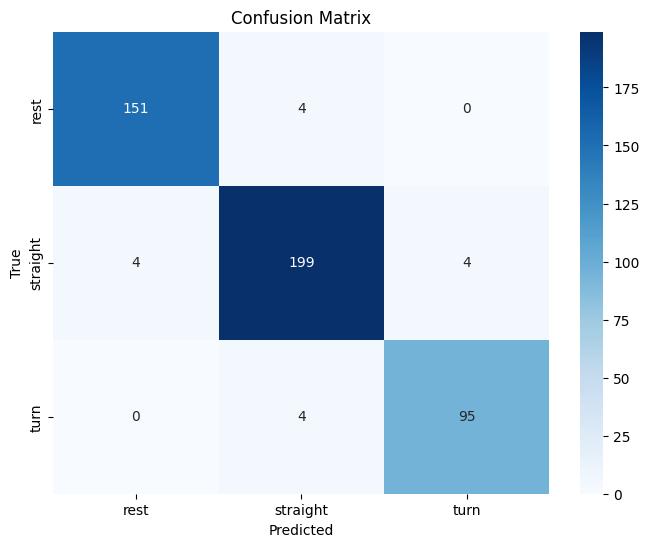

              precision    recall  f1-score   support

        rest       0.97      0.97      0.97       155
    straight       0.96      0.96      0.96       207
        turn       0.96      0.96      0.96        99

    accuracy                           0.97       461
   macro avg       0.97      0.97      0.97       461
weighted avg       0.97      0.97      0.97       461



In [19]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1.
2.  

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [20]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop('motion_state', axis=1)
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [21]:
# prompt: Load the target vector from test_set2 into y2, and all features from test_set2 into X2

# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# (1 marks)
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


In [22]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [23]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
# Predict the accuracy of the model on test_set1
accuracy1 = grid.score(X1, y1)
print(f"Test set 1 accuracy: {accuracy1:.2f}")

# Predict the accuracy of the model on test_set2
accuracy2 = grid.score(X2, y2)
print(f"Test set 2 accuracy: {accuracy2:.2f}")

Test set 1 accuracy: 0.94
Test set 2 accuracy: 0.75


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

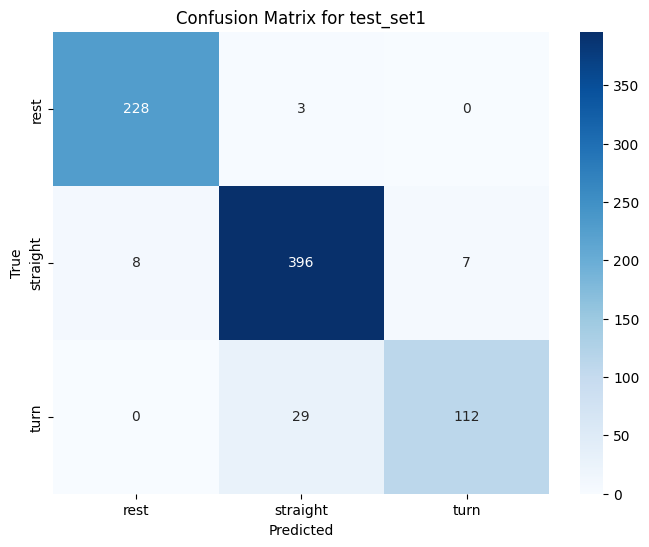

              precision    recall  f1-score   support

        rest       0.97      0.99      0.98       231
    straight       0.93      0.96      0.94       411
        turn       0.94      0.79      0.86       141

    accuracy                           0.94       783
   macro avg       0.94      0.91      0.93       783
weighted avg       0.94      0.94      0.94       783



In [24]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)
# Predict on the test set using the best model
y1_pred = best_model.predict(X1)

# Create the confusion matrix
cm = confusion_matrix(y1, y1_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set1")
plt.show()

# Print the classification report
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

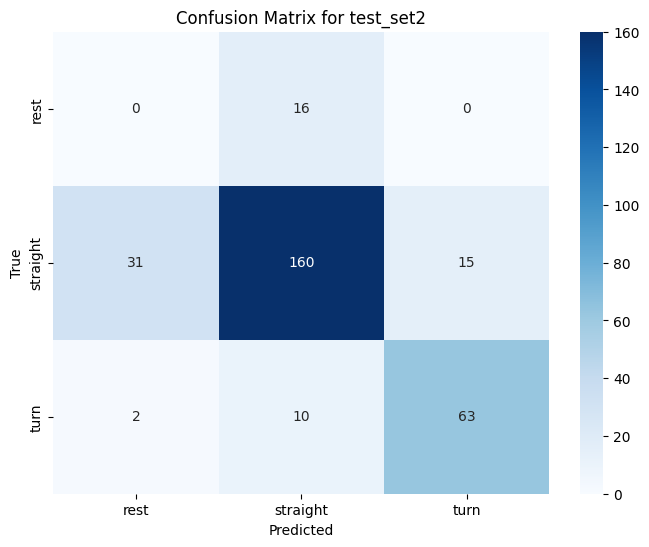

              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.86      0.78      0.82       206
        turn       0.81      0.84      0.82        75

    accuracy                           0.75       297
   macro avg       0.56      0.54      0.55       297
weighted avg       0.80      0.75      0.77       297



In [25]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict on the test set using the best model
y2_pred = best_model.predict(X2)

# Create the confusion matrix
cm = confusion_matrix(y2, y2_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for test_set2")
plt.show()

# Print the classification report
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1.
1.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [26]:
# TODO - Load selected features from cv_set to X
# (1 marks)
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [27]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [28]:
# TODO - Perform model training and tuning using `GridSearchCV`
 # Define the pipeline
pipe_selected = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC())
])

# Define the parameter grid for tuning
param_grid_selected = {
    'scaler': [StandardScaler(), None],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

# Initialize GridSearchCV
grid_selected = GridSearchCV(pipe_selected, param_grid_selected, cv=5, scoring='accuracy', return_train_score=True)

# Perform the grid search
grid_selected.fit(X, y)

# Display the best parameters and cross-validation accuracy
print("Best parameters:", grid_selected.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_selected.best_score_))


Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}
Best cross-validation accuracy: 0.81


___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [29]:
# TODO: Print the results from the grid search
X_test_selected = X_test[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
print("Best params:\n{}\n".format(grid_selected.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid_selected.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid_selected.best_score_))
print("Test-set score: {:.2f}".format(grid_selected.score(X_test_selected, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': StandardScaler()}

Best cross-validation train score: 0.93
Best cross-validation validation score: 0.81
Test-set score: 0.86


Display the confusion matrix and print the classification report for the trained model using the *test* split.

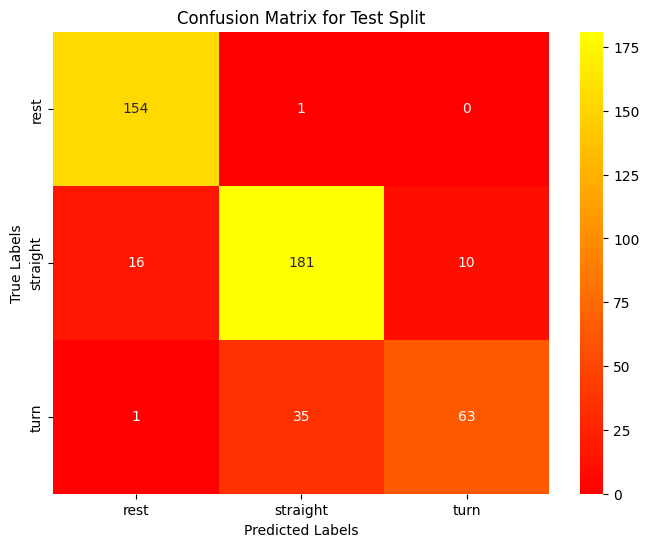

Classification Report for Test Split:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       155
    straight       0.83      0.87      0.85       207
        turn       0.86      0.64      0.73        99

    accuracy                           0.86       461
   macro avg       0.87      0.83      0.84       461
weighted avg       0.86      0.86      0.86       461



In [30]:
# TODO - Display confusion matrix and print classification reports
y_test_pred = grid_selected.predict(X_test_selected)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='autumn', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Test Split")
plt.show()
print("Classification Report for Test Split:")
print(classification_report(y_test, y_test_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [31]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [32]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [33]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid_selected.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid_selected.score(X2, y2)))

test_set1 score: 0.83
test_set2 score: 0.82


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

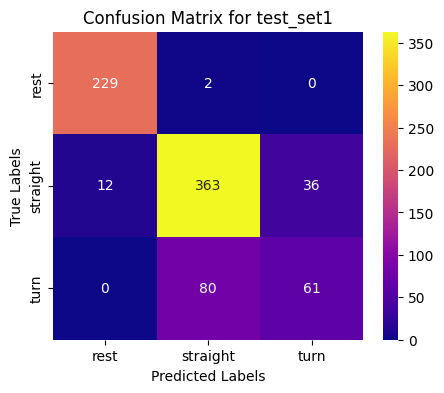

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       231
    straight       0.82      0.88      0.85       411
        turn       0.63      0.43      0.51       141

    accuracy                           0.83       783
   macro avg       0.80      0.77      0.78       783
weighted avg       0.82      0.83      0.82       783



In [34]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid_selected.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='plasma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

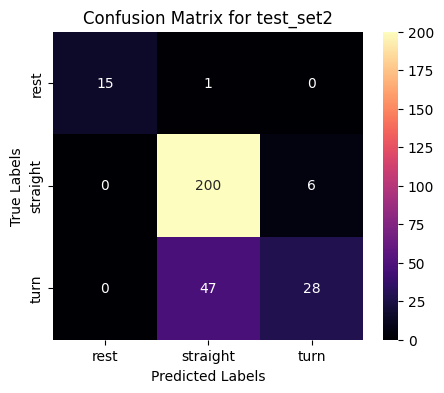

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.81      0.97      0.88       206
        turn       0.82      0.37      0.51        75

    accuracy                           0.82       297
   macro avg       0.88      0.76      0.79       297
weighted avg       0.82      0.82      0.79       297



In [35]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid_selected.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='magma', xticklabels=grid_selected.classes_, yticklabels=grid_selected.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1.
2.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [36]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,2.365611e-09,6.964705e-10,0.024992,0.023871,0.022554
1,2.242613e-09,6.533136e-10,0.024828,0.024153,0.021731


In [37]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [38]:
# TODO - Perform model training and tuning using `GridSearchCV`
 # Perform train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define pipeline and SVC model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', SVC())          # SVC classifier
])

# Define parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [39]:
# TODO - Perform model training and tuning using `GridSearchCV`
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [40]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.93
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

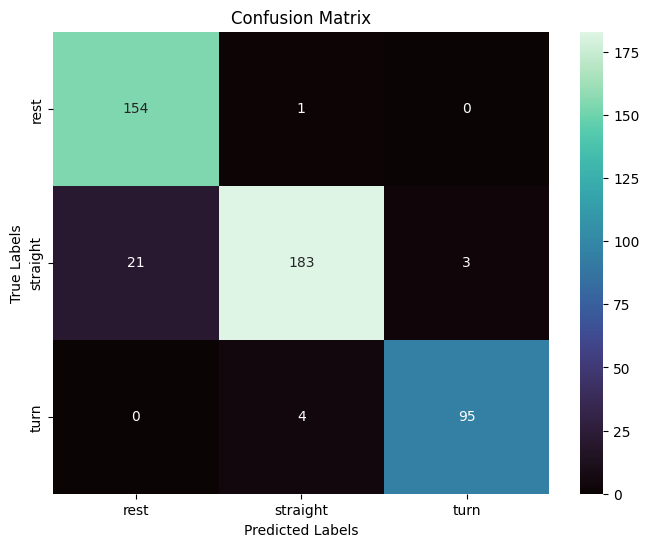

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.97      0.88      0.93       207
        turn       0.97      0.96      0.96        99

    accuracy                           0.94       461
   macro avg       0.94      0.95      0.94       461
weighted avg       0.94      0.94      0.94       461



In [41]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [42]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X1.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,3.655217e-09,6.507877e-10,0.024884,0.024056,0.025634
1,3.349120e-09,6.788807e-10,0.024881,0.024084,0.025218


In [43]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X2.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,1.718706e-09,1.211633e-09,0.049701,0.048406,0.012437
1,2.179497e-09,1.893673e-09,0.050477,0.047696,0.013805


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [44]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.27


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

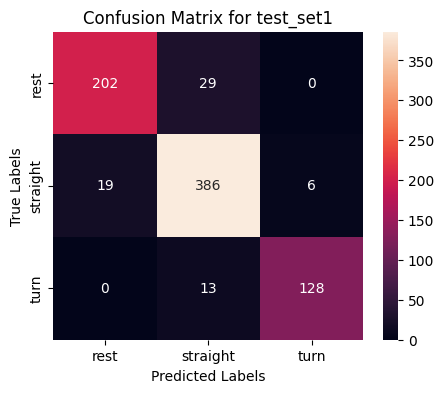

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.91      0.87      0.89       231
    straight       0.90      0.94      0.92       411
        turn       0.96      0.91      0.93       141

    accuracy                           0.91       783
   macro avg       0.92      0.91      0.91       783
weighted avg       0.92      0.91      0.91       783



In [45]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='rocket', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()

print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

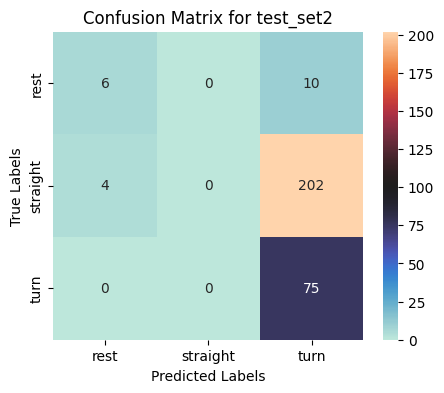

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.60      0.38      0.46        16
    straight       0.00      0.00      0.00       206
        turn       0.26      1.00      0.41        75

    accuracy                           0.27       297
   macro avg       0.29      0.46      0.29       297
weighted avg       0.10      0.27      0.13       297



In [46]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='icefire', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
1.
1.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [47]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [48]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [49]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [50]:
# Perform any missing imports
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('classifier', SVC())
])

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [51]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf']
}

In [52]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [53]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'pca__n_components': 16}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.94
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

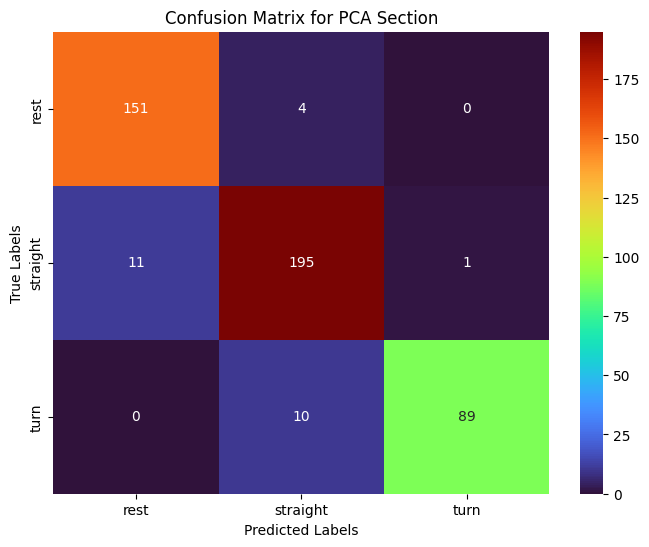

Classification Report for PCA Section:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.93      0.94      0.94       207
        turn       0.99      0.90      0.94        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.94       461
weighted avg       0.94      0.94      0.94       461



In [54]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='turbo', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for PCA Section")
plt.show()

print("Classification Report for PCA Section:")
print(classification_report(y_test, y_test_pred))

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [55]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [56]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


___

#### 4.2.2 - Visualize Results

In [57]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.91
test_set2 score: 0.40


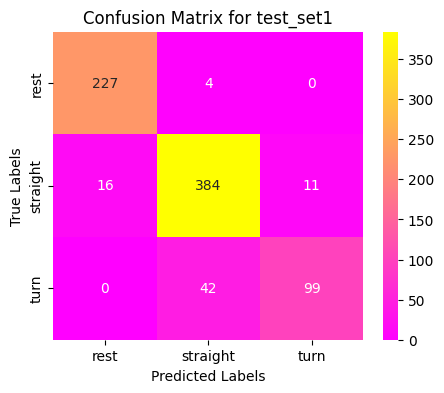

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.93      0.98      0.96       231
    straight       0.89      0.93      0.91       411
        turn       0.90      0.70      0.79       141

    accuracy                           0.91       783
   macro avg       0.91      0.87      0.89       783
weighted avg       0.91      0.91      0.90       783



In [58]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='spring', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

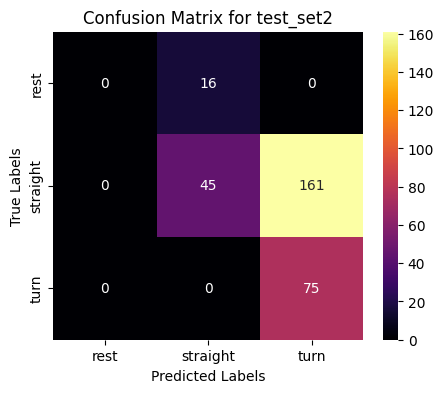

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.74      0.22      0.34       206
        turn       0.32      1.00      0.48        75

    accuracy                           0.40       297
   macro avg       0.35      0.41      0.27       297
weighted avg       0.59      0.40      0.36       297



In [59]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='inferno', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()

print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [74]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,2.365611e-09,6.964705e-10,0.024992,0.023871,0.022554
1,2.242613e-09,6.533136e-10,0.024828,0.024153,0.021731


In [75]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [76]:
# TODO - Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [63]:
# Perform any missing imports
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# TODO - Initiate the pipeline
# (1 mark)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [77]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

In [78]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__bootstrap': [True, False],
                         'classifier__max_depth': [None, 10, 20, 30],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [79]:
# TODO: Print the results from the grid search

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__bootstrap': True, 'classifier__max_depth': 30, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.93
Test-set score: 0.94


Display the confusion matrix and print the classification report for the trained model using the *test* split.

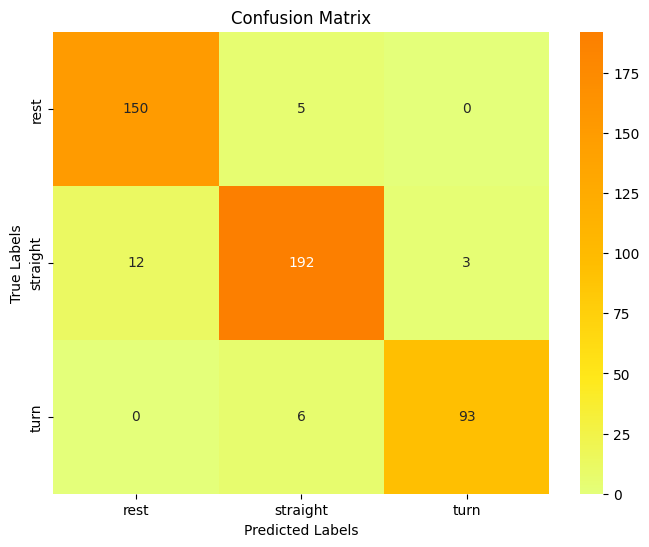

Classification Report:
              precision    recall  f1-score   support

        rest       0.93      0.97      0.95       155
    straight       0.95      0.93      0.94       207
        turn       0.97      0.94      0.95        99

    accuracy                           0.94       461
   macro avg       0.95      0.94      0.95       461
weighted avg       0.94      0.94      0.94       461



In [80]:
# TODO - Display confusion matrix and print classification report
y_test_pred = grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Wistia', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [82]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X1.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,3.655217e-09,6.507877e-10,0.024884,0.024056,0.025634
1,3.349120e-09,6.788807e-10,0.024881,0.024084,0.025218


In [83]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[['gx_var', 'gy_var', 'az_max', 'a_min', 'g_sum']]
X2.head(2)

,gx_var,gy_var,az_max,a_min,g_sum
0,1.718706e-09,1.211633e-09,0.049701,0.048406,0.012437
1,2.179497e-09,1.893673e-09,0.050477,0.047696,0.013805


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [84]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.82
test_set2 score: 0.90


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

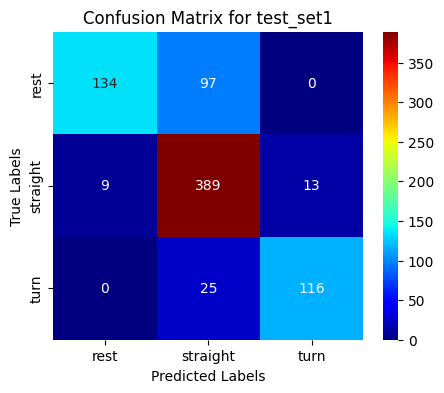

Classification Report for test_set1:
              precision    recall  f1-score   support

        rest       0.94      0.58      0.72       231
    straight       0.76      0.95      0.84       411
        turn       0.90      0.82      0.86       141

    accuracy                           0.82       783
   macro avg       0.87      0.78      0.81       783
weighted avg       0.84      0.82      0.81       783



In [85]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
y1_pred = grid.predict(X1)
conf_matrix1 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='jet', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set1")
plt.show()
print("Classification Report for test_set1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

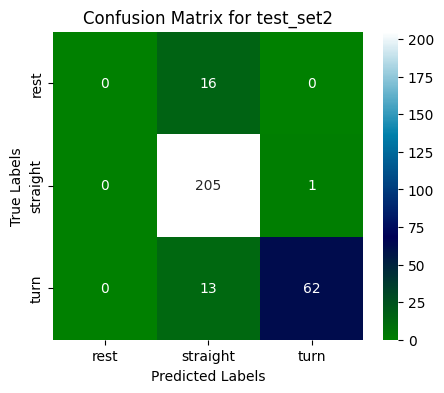

Classification Report for test_set2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.88      1.00      0.93       206
        turn       0.98      0.83      0.90        75

    accuracy                           0.90       297
   macro avg       0.62      0.61      0.61       297
weighted avg       0.86      0.90      0.87       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.predict(X2)
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='ocean', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for test_set2")
plt.show()
print("Classification Report for test_set2:")
print(classification_report(y2, y2_pred))

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


In [89]:
#Random Forest achieved superior results (94%, 82%, 90%) compared to SVC, is better in handling non-linear relationships and noisy data. SVC had challenges with imbalanced data and high-dimensional features, requiring additional adjustments for optimal configuration. Random Forest’s ensemble method and robustness to noise made it a better fit. Optimized hyperparameters also contributed to its stronger performance.

____